<a href="https://colab.research.google.com/github/iomkarsurve/Doge-Coin-Prediction/blob/main/Doge_Coin_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install prophet

     |████████████████████████████████| 65 kB 2.4 MB/s 
     |████████████████████████████████| 49 kB 4.9 MB/s 
     |████████████████████████████████| 214 kB 11.6 MB/s 





  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640023 sha256=73f8bb9f2ec6d7001c61acb8d5be8ed78a631e71f6564fbf46843bb0edc28840
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [3]:
import pandas as pd
from fbprophet import Prophet

In [6]:
df = pd.read_csv('DOGE-USD.csv')

In [7]:
df = df[["Date","Close"]]

In [8]:
df.columns = ["ds","y"]

In [9]:
print(df)

             ds         y
0    2020-10-17  0.002581
1    2020-10-18  0.002586
2    2020-10-19  0.002590
3    2020-10-20  0.002601
4    2020-10-21  0.002630
..          ...       ...
361  2021-10-13  0.232572
362  2021-10-14  0.232273
363  2021-10-15  0.233782
364  2021-10-16       NaN
365  2021-10-17  0.236768

[366 rows x 2 columns]


In [16]:
prophet= Prophet( yearly_seasonality=True,daily_seasonality=True)

In [17]:
prophet.fit(df)

In [18]:
future = prophet.make_future_dataframe(periods=365)

In [19]:
print(future)

            ds
0   2020-10-17
1   2020-10-18
2   2020-10-19
3   2020-10-20
4   2020-10-21
..         ...
726 2022-10-13
727 2022-10-14
728 2022-10-15
729 2022-10-16
730 2022-10-17

[731 rows x 1 columns]


In [20]:
forecast = prophet.predict(future)

In [27]:
forecast[["ds","yhat","yhat_lower","yhat_upper"]].head(400)

,ds,yhat,yhat_lower,yhat_upper
0,2020-10-17,-0.003480,-0.048736,0.039071
1,2020-10-18,-0.003620,-0.048184,0.041195
2,2020-10-19,-0.005095,-0.051202,0.037603
3,2020-10-20,-0.005275,-0.049256,0.038626
4,2020-10-21,-0.002822,-0.046701,0.040476
...,...,...,...,...
395,2021-11-16,0.248647,0.207611,0.292293
396,2021-11-17,0.249899,0.206960,0.291381
397,2021-11-18,0.249582,0.207522,0.293227
398,2021-11-19,0.255248,0.214019,0.301645


In [23]:
from fbprophet.plot import plot

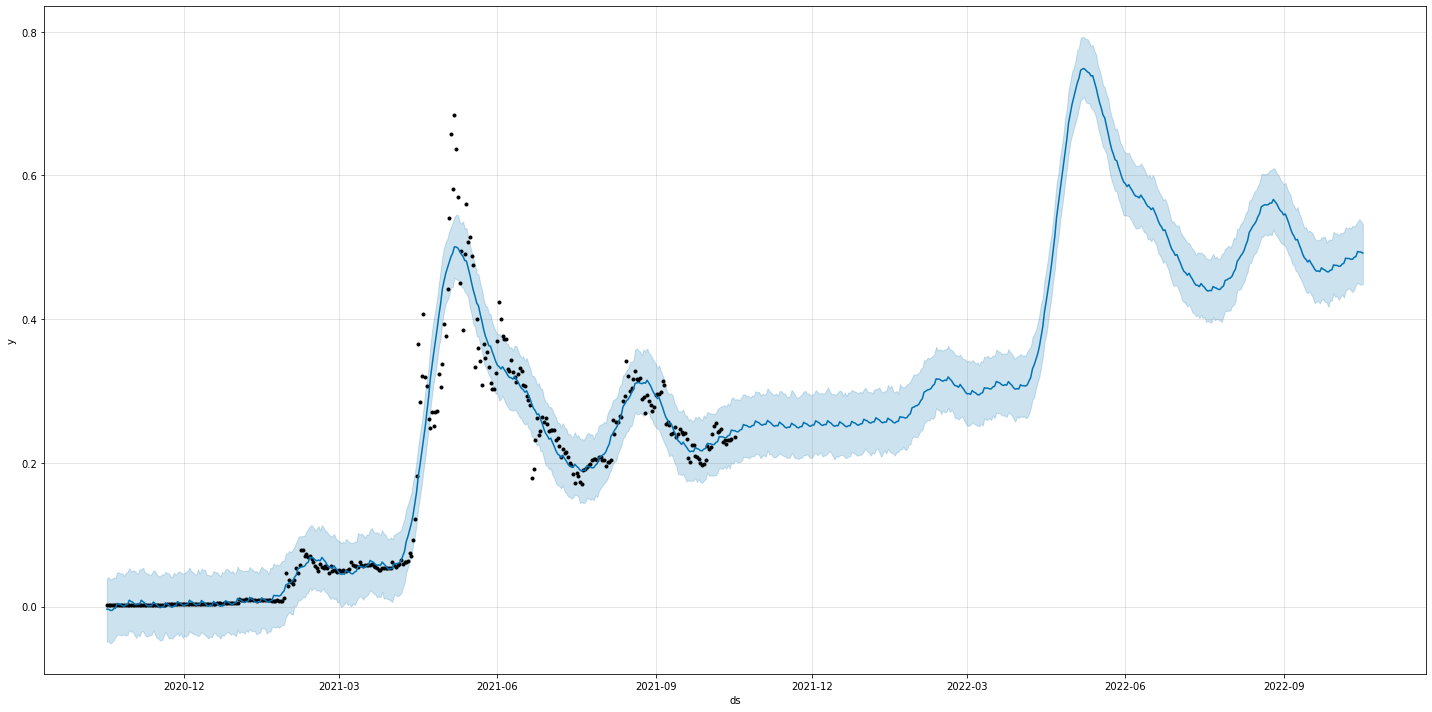

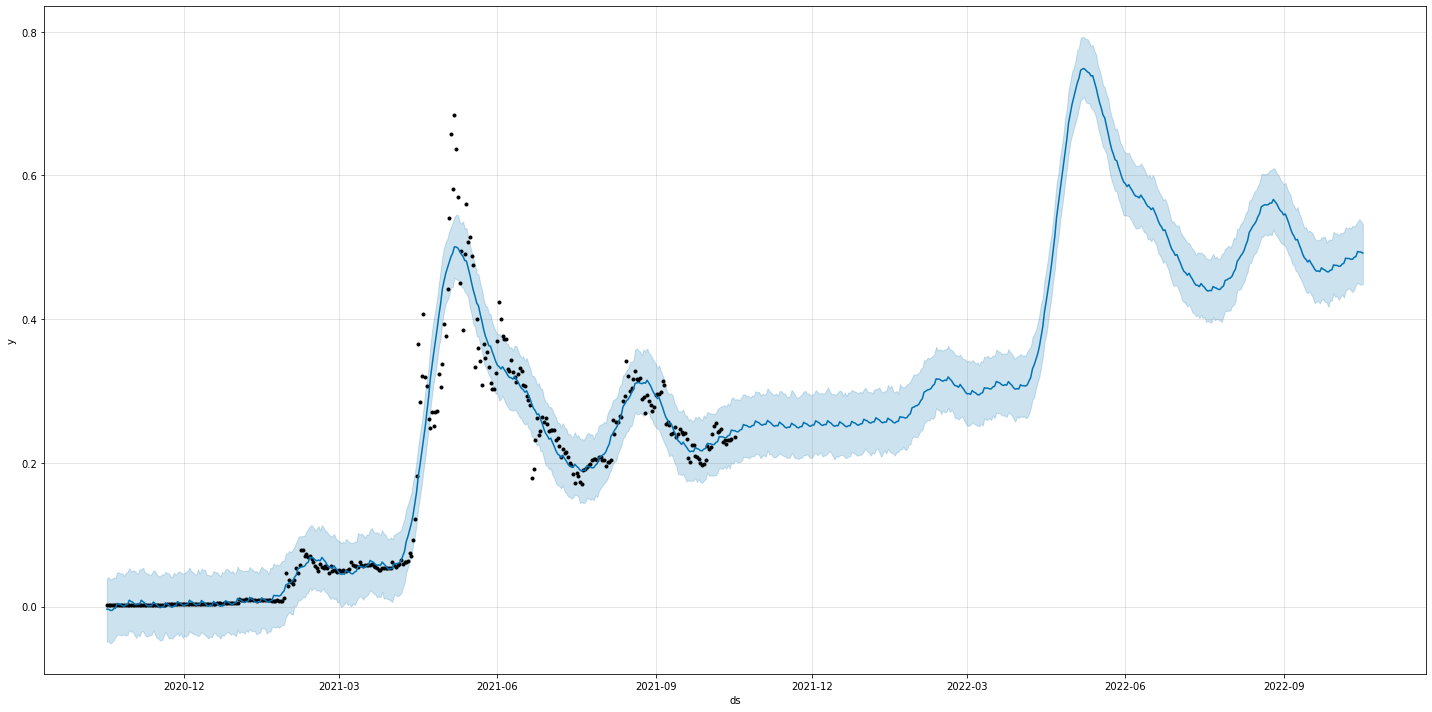

In [24]:
prophet.plot(forecast,figsize=(20,10))